In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('C:\\Users\\mohdz\\OneDrive\\Desktop\\Carbon_Prediction_LSTM\\data\\processed\\co2_world.csv')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [3]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [4]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train = poly.fit_transform(train_data['date'].values.reshape(-1,1))
X_test = poly.transform(test_data['date'].values.reshape(-1,1))
y_train = train_data['co2'].values
y_test = test_data['co2'].values

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [7]:
train_score = np.sqrt(np.mean(np.square(y_train - train_predictions)))
test_score = np.sqrt(np.mean(np.square(y_test - test_predictions)))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 4.29 RMSE
Test Score: 17.92 RMSE


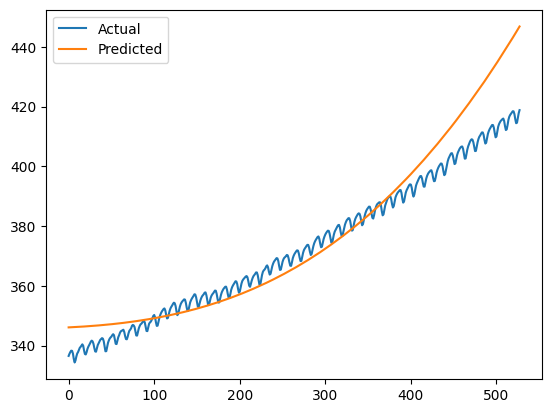

In [8]:
plt.plot(df.index, df['co2'], label='Actual')
plt.plot(np.concatenate((train_data.index.to_numpy(), test_data.index.to_numpy())),np.concatenate((train_predictions, test_predictions)), label='Predicted')
plt.legend()
plt.show()

In [9]:
future_dates = pd.date_range(start='2020-01-01', end='2030-1-01', freq='Y')
future_predictions = poly.transform(future_dates.values.reshape(-1,1))
future_predictions = model.predict(future_predictions)
future_predictions

array([436.21480834, 441.64572998, 447.28946502, 453.15010344,
       459.24870453, 465.55604193, 472.09256385, 478.86236028,
       485.88904868, 493.13833118])

In [10]:
future_df = pd.DataFrame({'date': future_dates.ravel(), 'co2': future_predictions.ravel()})
future_df.set_index('date', inplace=True)
df.set_index('date', inplace=True)

C:\Users\mohdz\AppData\Local\Temp\ipykernel_4980\4113876911.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  future_df = pd.DataFrame({'date': future_dates.ravel(), 'co2': future_predictions.ravel()})


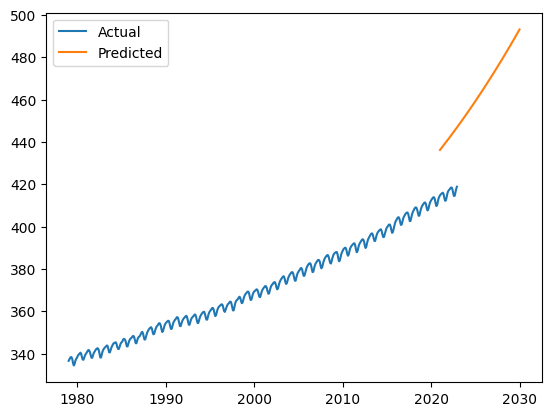

In [11]:
plt.plot(df.index, df['co2'], label='Actual')
plt.plot(future_df.index, future_df.co2, label='Predicted')
plt.legend()
plt.show()